# Navigation

---

In this notebook,  we will use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment




#### 1.1 Unity ML-Agents
Unity Machine Learning Agents (ML-Agents) is an open-source Unity plugin that enables games and simulations to serve as environments for training intelligent agents. For game developers, these trained agents can be used for multiple purposes, including controlling [NPC](https://en.wikipedia.org/wiki/Non-player_character) behavior (in a variety of settings such as multi-agent and adversarial), automated testing of game builds and evaluating different game design decisions pre-release.

In this project, we will use Unity's rich environments to design, train, and evaluate your own deep reinforcement learning algorithms. You can read more about ML-Agents by perusing the [GitHub repository](https://github.com/Unity-Technologies/ml-agents).




#### 1.2 The environment

For this project, we will train an agent to navigate (and collect bananas!) in a large, square world.
A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.

![SegmentLocal](banana.gif "banana")

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:

- 0 move forward.
- 1 move backward.
- 2 turn left.
- 3 turn right.

The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes.

**Note:**
The project environment is similar to, but not identical to the Banana Collector environment on the Unity ML-Agents GitHub page.




#### 1.3 Packages
We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, we will see how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, we can watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows us to observe the agent, as it moves through the environment.  

Of course, as part of the project, we will change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train the agent

Next train our own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Instantiate the Environment and Agent
from agent import Agent
framework = 'DQN'  #  'DQN' or 'DDQN'
#buffer_type = 'PER_ReplayBuffer'  
buffer_type = 'ReplayBuffer' 
# setup parameter framework to determine whether to use DQN or DDQN; Different framework has different def of function "learn"
agent = Agent(state_size=state_size, action_size=action_size, seed=0, framework = framework, buffer_type = buffer_type)


In [8]:
# watch an untrained agent
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]            # get the current state
score = 0  
for j in range(200):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    #state, reward, done, _ = env.step(action)
    if done:
        break 
        
print('Score: {}'.format(score))

Score: 0


#### Train the Agent with framework is DQN or DDQN and buffer type is Replay Buffer or PER Replay Buffer

In [9]:
def dqn_ddqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        # state = env.reset() old
        env_info = env.reset(train_mode=True)[brain_name] #new
        state = env_info.vector_observations[0] #new
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name] #new
            next_state = env_info.vector_observations[0] #new
            reward = env_info.rewards[0] #new
            done = env_info.local_done[0] #new

            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), framework + '_' + buffer_type + '_' + 'checkpoint.pth')
            #break
    return scores

In [10]:
scores = dqn_ddqn()

Episode 100	Average Score: 1.90
Episode 200	Average Score: 7.34
Episode 300	Average Score: 11.43
Episode 369	Average Score: 13.03
Environment solved in 269 episodes!	Average Score: 13.03
Episode 374	Average Score: 13.01
Environment solved in 274 episodes!	Average Score: 13.01
Episode 375	Average Score: 13.10
Environment solved in 275 episodes!	Average Score: 13.10
Episode 376	Average Score: 13.02
Environment solved in 276 episodes!	Average Score: 13.02
Episode 377	Average Score: 13.07
Environment solved in 277 episodes!	Average Score: 13.07
Episode 378	Average Score: 13.09
Environment solved in 278 episodes!	Average Score: 13.09
Episode 379	Average Score: 13.10
Environment solved in 279 episodes!	Average Score: 13.10
Episode 380	Average Score: 13.11
Environment solved in 280 episodes!	Average Score: 13.11
Episode 382	Average Score: 13.06
Environment solved in 282 episodes!	Average Score: 13.06
Episode 383	Average Score: 13.17
Environment solved in 283 episodes!	Average Score: 13.17
Epi

Episode 464	Average Score: 15.19
Environment solved in 364 episodes!	Average Score: 15.19
Episode 465	Average Score: 15.15
Environment solved in 365 episodes!	Average Score: 15.15
Episode 466	Average Score: 15.08
Environment solved in 366 episodes!	Average Score: 15.08
Episode 467	Average Score: 15.08
Environment solved in 367 episodes!	Average Score: 15.08
Episode 468	Average Score: 15.07
Environment solved in 368 episodes!	Average Score: 15.07
Episode 469	Average Score: 15.00
Environment solved in 369 episodes!	Average Score: 15.00
Episode 470	Average Score: 15.00
Environment solved in 370 episodes!	Average Score: 15.00
Episode 471	Average Score: 15.03
Environment solved in 371 episodes!	Average Score: 15.03
Episode 472	Average Score: 15.07
Environment solved in 372 episodes!	Average Score: 15.07
Episode 473	Average Score: 15.09
Environment solved in 373 episodes!	Average Score: 15.09
Episode 474	Average Score: 15.13
Environment solved in 374 episodes!	Average Score: 15.13
Episode 47

Episode 556	Average Score: 15.65
Environment solved in 456 episodes!	Average Score: 15.65
Episode 557	Average Score: 15.73
Environment solved in 457 episodes!	Average Score: 15.73
Episode 558	Average Score: 15.69
Environment solved in 458 episodes!	Average Score: 15.69
Episode 559	Average Score: 15.74
Environment solved in 459 episodes!	Average Score: 15.74
Episode 560	Average Score: 15.76
Environment solved in 460 episodes!	Average Score: 15.76
Episode 561	Average Score: 15.78
Environment solved in 461 episodes!	Average Score: 15.78
Episode 562	Average Score: 15.81
Environment solved in 462 episodes!	Average Score: 15.81
Episode 563	Average Score: 15.87
Environment solved in 463 episodes!	Average Score: 15.87
Episode 564	Average Score: 15.85
Environment solved in 464 episodes!	Average Score: 15.85
Episode 565	Average Score: 15.93
Environment solved in 465 episodes!	Average Score: 15.93
Episode 566	Average Score: 16.02
Environment solved in 466 episodes!	Average Score: 16.02
Episode 56

Episode 648	Average Score: 15.25
Environment solved in 548 episodes!	Average Score: 15.25
Episode 649	Average Score: 15.20
Environment solved in 549 episodes!	Average Score: 15.20
Episode 650	Average Score: 15.21
Environment solved in 550 episodes!	Average Score: 15.21
Episode 651	Average Score: 15.16
Environment solved in 551 episodes!	Average Score: 15.16
Episode 652	Average Score: 15.18
Environment solved in 552 episodes!	Average Score: 15.18
Episode 653	Average Score: 15.13
Environment solved in 553 episodes!	Average Score: 15.13
Episode 654	Average Score: 15.14
Environment solved in 554 episodes!	Average Score: 15.14
Episode 655	Average Score: 15.13
Environment solved in 555 episodes!	Average Score: 15.13
Episode 656	Average Score: 15.14
Environment solved in 556 episodes!	Average Score: 15.14
Episode 657	Average Score: 15.13
Environment solved in 557 episodes!	Average Score: 15.13
Episode 658	Average Score: 15.22
Environment solved in 558 episodes!	Average Score: 15.22
Episode 65

Episode 740	Average Score: 16.02
Environment solved in 640 episodes!	Average Score: 16.02
Episode 741	Average Score: 16.01
Environment solved in 641 episodes!	Average Score: 16.01
Episode 742	Average Score: 16.02
Environment solved in 642 episodes!	Average Score: 16.02
Episode 743	Average Score: 16.07
Environment solved in 643 episodes!	Average Score: 16.07
Episode 744	Average Score: 16.03
Environment solved in 644 episodes!	Average Score: 16.03
Episode 745	Average Score: 16.14
Environment solved in 645 episodes!	Average Score: 16.14
Episode 746	Average Score: 16.18
Environment solved in 646 episodes!	Average Score: 16.18
Episode 747	Average Score: 16.28
Environment solved in 647 episodes!	Average Score: 16.28
Episode 748	Average Score: 16.32
Environment solved in 648 episodes!	Average Score: 16.32
Episode 749	Average Score: 16.38
Environment solved in 649 episodes!	Average Score: 16.38
Episode 750	Average Score: 16.42
Environment solved in 650 episodes!	Average Score: 16.42
Episode 75

Episode 832	Average Score: 16.73
Environment solved in 732 episodes!	Average Score: 16.73
Episode 833	Average Score: 16.74
Environment solved in 733 episodes!	Average Score: 16.74
Episode 834	Average Score: 16.74
Environment solved in 734 episodes!	Average Score: 16.74
Episode 835	Average Score: 16.71
Environment solved in 735 episodes!	Average Score: 16.71
Episode 836	Average Score: 16.70
Environment solved in 736 episodes!	Average Score: 16.70
Episode 837	Average Score: 16.71
Environment solved in 737 episodes!	Average Score: 16.71
Episode 838	Average Score: 16.73
Environment solved in 738 episodes!	Average Score: 16.73
Episode 839	Average Score: 16.70
Environment solved in 739 episodes!	Average Score: 16.70
Episode 840	Average Score: 16.76
Environment solved in 740 episodes!	Average Score: 16.76
Episode 841	Average Score: 16.72
Environment solved in 741 episodes!	Average Score: 16.72
Episode 842	Average Score: 16.65
Environment solved in 742 episodes!	Average Score: 16.65
Episode 84

Episode 924	Average Score: 16.83
Environment solved in 824 episodes!	Average Score: 16.83
Episode 925	Average Score: 16.89
Environment solved in 825 episodes!	Average Score: 16.89
Episode 926	Average Score: 17.00
Environment solved in 826 episodes!	Average Score: 17.00
Episode 927	Average Score: 17.06
Environment solved in 827 episodes!	Average Score: 17.06
Episode 928	Average Score: 16.97
Environment solved in 828 episodes!	Average Score: 16.97
Episode 929	Average Score: 16.90
Environment solved in 829 episodes!	Average Score: 16.90
Episode 930	Average Score: 16.95
Environment solved in 830 episodes!	Average Score: 16.95
Episode 931	Average Score: 16.94
Environment solved in 831 episodes!	Average Score: 16.94
Episode 932	Average Score: 16.94
Environment solved in 832 episodes!	Average Score: 16.94
Episode 933	Average Score: 16.91
Environment solved in 833 episodes!	Average Score: 16.91
Episode 934	Average Score: 16.91
Environment solved in 834 episodes!	Average Score: 16.91
Episode 93

Episode 1015	Average Score: 16.58
Environment solved in 915 episodes!	Average Score: 16.58
Episode 1016	Average Score: 16.58
Environment solved in 916 episodes!	Average Score: 16.58
Episode 1017	Average Score: 16.63
Environment solved in 917 episodes!	Average Score: 16.63
Episode 1018	Average Score: 16.62
Environment solved in 918 episodes!	Average Score: 16.62
Episode 1019	Average Score: 16.65
Environment solved in 919 episodes!	Average Score: 16.65
Episode 1020	Average Score: 16.68
Environment solved in 920 episodes!	Average Score: 16.68
Episode 1021	Average Score: 16.70
Environment solved in 921 episodes!	Average Score: 16.70
Episode 1022	Average Score: 16.60
Environment solved in 922 episodes!	Average Score: 16.60
Episode 1023	Average Score: 16.59
Environment solved in 923 episodes!	Average Score: 16.59
Episode 1024	Average Score: 16.64
Environment solved in 924 episodes!	Average Score: 16.64
Episode 1025	Average Score: 16.49
Environment solved in 925 episodes!	Average Score: 16.49

Episode 1105	Average Score: 16.35
Environment solved in 1005 episodes!	Average Score: 16.35
Episode 1106	Average Score: 16.40
Environment solved in 1006 episodes!	Average Score: 16.40
Episode 1107	Average Score: 16.38
Environment solved in 1007 episodes!	Average Score: 16.38
Episode 1108	Average Score: 16.41
Environment solved in 1008 episodes!	Average Score: 16.41
Episode 1109	Average Score: 16.42
Environment solved in 1009 episodes!	Average Score: 16.42
Episode 1110	Average Score: 16.36
Environment solved in 1010 episodes!	Average Score: 16.36
Episode 1111	Average Score: 16.33
Environment solved in 1011 episodes!	Average Score: 16.33
Episode 1112	Average Score: 16.33
Environment solved in 1012 episodes!	Average Score: 16.33
Episode 1113	Average Score: 16.28
Environment solved in 1013 episodes!	Average Score: 16.28
Episode 1114	Average Score: 16.27
Environment solved in 1014 episodes!	Average Score: 16.27
Episode 1115	Average Score: 16.38
Environment solved in 1015 episodes!	Average S

Episode 1195	Average Score: 15.91
Environment solved in 1095 episodes!	Average Score: 15.91
Episode 1196	Average Score: 15.89
Environment solved in 1096 episodes!	Average Score: 15.89
Episode 1197	Average Score: 15.90
Environment solved in 1097 episodes!	Average Score: 15.90
Episode 1198	Average Score: 15.87
Environment solved in 1098 episodes!	Average Score: 15.87
Episode 1199	Average Score: 15.91
Environment solved in 1099 episodes!	Average Score: 15.91
Episode 1200	Average Score: 15.84

Environment solved in 1100 episodes!	Average Score: 15.84
Episode 1201	Average Score: 15.85
Environment solved in 1101 episodes!	Average Score: 15.85
Episode 1202	Average Score: 15.88
Environment solved in 1102 episodes!	Average Score: 15.88
Episode 1203	Average Score: 15.94
Environment solved in 1103 episodes!	Average Score: 15.94
Episode 1204	Average Score: 16.01
Environment solved in 1104 episodes!	Average Score: 16.01
Episode 1205	Average Score: 15.97
Environment solved in 1105 episodes!	Average 

Episode 1285	Average Score: 16.21
Environment solved in 1185 episodes!	Average Score: 16.21
Episode 1286	Average Score: 16.20
Environment solved in 1186 episodes!	Average Score: 16.20
Episode 1287	Average Score: 16.21
Environment solved in 1187 episodes!	Average Score: 16.21
Episode 1288	Average Score: 16.22
Environment solved in 1188 episodes!	Average Score: 16.22
Episode 1289	Average Score: 16.17
Environment solved in 1189 episodes!	Average Score: 16.17
Episode 1290	Average Score: 16.16
Environment solved in 1190 episodes!	Average Score: 16.16
Episode 1291	Average Score: 16.15
Environment solved in 1191 episodes!	Average Score: 16.15
Episode 1292	Average Score: 16.19
Environment solved in 1192 episodes!	Average Score: 16.19
Episode 1293	Average Score: 16.16
Environment solved in 1193 episodes!	Average Score: 16.16
Episode 1294	Average Score: 16.21
Environment solved in 1194 episodes!	Average Score: 16.21
Episode 1295	Average Score: 16.22
Environment solved in 1195 episodes!	Average S

Episode 1375	Average Score: 16.52
Environment solved in 1275 episodes!	Average Score: 16.52
Episode 1376	Average Score: 16.42
Environment solved in 1276 episodes!	Average Score: 16.42
Episode 1377	Average Score: 16.40
Environment solved in 1277 episodes!	Average Score: 16.40
Episode 1378	Average Score: 16.32
Environment solved in 1278 episodes!	Average Score: 16.32
Episode 1379	Average Score: 16.34
Environment solved in 1279 episodes!	Average Score: 16.34
Episode 1380	Average Score: 16.33
Environment solved in 1280 episodes!	Average Score: 16.33
Episode 1381	Average Score: 16.31
Environment solved in 1281 episodes!	Average Score: 16.31
Episode 1382	Average Score: 16.32
Environment solved in 1282 episodes!	Average Score: 16.32
Episode 1383	Average Score: 16.35
Environment solved in 1283 episodes!	Average Score: 16.35
Episode 1384	Average Score: 16.36
Environment solved in 1284 episodes!	Average Score: 16.36
Episode 1385	Average Score: 16.45
Environment solved in 1285 episodes!	Average S

Episode 1465	Average Score: 16.40
Environment solved in 1365 episodes!	Average Score: 16.40
Episode 1466	Average Score: 16.32
Environment solved in 1366 episodes!	Average Score: 16.32
Episode 1467	Average Score: 16.31
Environment solved in 1367 episodes!	Average Score: 16.31
Episode 1468	Average Score: 16.32
Environment solved in 1368 episodes!	Average Score: 16.32
Episode 1469	Average Score: 16.37
Environment solved in 1369 episodes!	Average Score: 16.37
Episode 1470	Average Score: 16.42
Environment solved in 1370 episodes!	Average Score: 16.42
Episode 1471	Average Score: 16.45
Environment solved in 1371 episodes!	Average Score: 16.45
Episode 1472	Average Score: 16.47
Environment solved in 1372 episodes!	Average Score: 16.47
Episode 1473	Average Score: 16.50
Environment solved in 1373 episodes!	Average Score: 16.50
Episode 1474	Average Score: 16.54
Environment solved in 1374 episodes!	Average Score: 16.54
Episode 1475	Average Score: 16.63
Environment solved in 1375 episodes!	Average S

Episode 1555	Average Score: 16.78
Environment solved in 1455 episodes!	Average Score: 16.78
Episode 1556	Average Score: 16.83
Environment solved in 1456 episodes!	Average Score: 16.83
Episode 1557	Average Score: 16.88
Environment solved in 1457 episodes!	Average Score: 16.88
Episode 1558	Average Score: 16.94
Environment solved in 1458 episodes!	Average Score: 16.94
Episode 1559	Average Score: 16.97
Environment solved in 1459 episodes!	Average Score: 16.97
Episode 1560	Average Score: 17.00
Environment solved in 1460 episodes!	Average Score: 17.00
Episode 1561	Average Score: 17.02
Environment solved in 1461 episodes!	Average Score: 17.02
Episode 1562	Average Score: 16.99
Environment solved in 1462 episodes!	Average Score: 16.99
Episode 1563	Average Score: 17.00
Environment solved in 1463 episodes!	Average Score: 17.00
Episode 1564	Average Score: 17.00
Environment solved in 1464 episodes!	Average Score: 17.00
Episode 1565	Average Score: 17.03
Environment solved in 1465 episodes!	Average S

Episode 1645	Average Score: 16.04
Environment solved in 1545 episodes!	Average Score: 16.04
Episode 1646	Average Score: 16.00
Environment solved in 1546 episodes!	Average Score: 16.00
Episode 1647	Average Score: 15.97
Environment solved in 1547 episodes!	Average Score: 15.97
Episode 1648	Average Score: 15.97
Environment solved in 1548 episodes!	Average Score: 15.97
Episode 1649	Average Score: 16.03
Environment solved in 1549 episodes!	Average Score: 16.03
Episode 1650	Average Score: 16.07
Environment solved in 1550 episodes!	Average Score: 16.07
Episode 1651	Average Score: 16.05
Environment solved in 1551 episodes!	Average Score: 16.05
Episode 1652	Average Score: 16.10
Environment solved in 1552 episodes!	Average Score: 16.10
Episode 1653	Average Score: 16.00
Environment solved in 1553 episodes!	Average Score: 16.00
Episode 1654	Average Score: 16.05
Environment solved in 1554 episodes!	Average Score: 16.05
Episode 1655	Average Score: 15.99
Environment solved in 1555 episodes!	Average S

Episode 1735	Average Score: 16.46
Environment solved in 1635 episodes!	Average Score: 16.46
Episode 1736	Average Score: 16.42
Environment solved in 1636 episodes!	Average Score: 16.42
Episode 1737	Average Score: 16.24
Environment solved in 1637 episodes!	Average Score: 16.24
Episode 1738	Average Score: 16.36
Environment solved in 1638 episodes!	Average Score: 16.36
Episode 1739	Average Score: 16.35
Environment solved in 1639 episodes!	Average Score: 16.35
Episode 1740	Average Score: 16.43
Environment solved in 1640 episodes!	Average Score: 16.43
Episode 1741	Average Score: 16.45
Environment solved in 1641 episodes!	Average Score: 16.45
Episode 1742	Average Score: 16.50
Environment solved in 1642 episodes!	Average Score: 16.50
Episode 1743	Average Score: 16.46
Environment solved in 1643 episodes!	Average Score: 16.46
Episode 1744	Average Score: 16.59
Environment solved in 1644 episodes!	Average Score: 16.59
Episode 1745	Average Score: 16.59
Environment solved in 1645 episodes!	Average S

Episode 1825	Average Score: 16.12
Environment solved in 1725 episodes!	Average Score: 16.12
Episode 1826	Average Score: 16.16
Environment solved in 1726 episodes!	Average Score: 16.16
Episode 1827	Average Score: 16.20
Environment solved in 1727 episodes!	Average Score: 16.20
Episode 1828	Average Score: 16.24
Environment solved in 1728 episodes!	Average Score: 16.24
Episode 1829	Average Score: 16.26
Environment solved in 1729 episodes!	Average Score: 16.26
Episode 1830	Average Score: 16.27
Environment solved in 1730 episodes!	Average Score: 16.27
Episode 1831	Average Score: 16.23
Environment solved in 1731 episodes!	Average Score: 16.23
Episode 1832	Average Score: 16.26
Environment solved in 1732 episodes!	Average Score: 16.26
Episode 1833	Average Score: 16.26
Environment solved in 1733 episodes!	Average Score: 16.26
Episode 1834	Average Score: 16.22
Environment solved in 1734 episodes!	Average Score: 16.22
Episode 1835	Average Score: 16.34
Environment solved in 1735 episodes!	Average S

Episode 1915	Average Score: 16.48
Environment solved in 1815 episodes!	Average Score: 16.48
Episode 1916	Average Score: 16.51
Environment solved in 1816 episodes!	Average Score: 16.51
Episode 1917	Average Score: 16.47
Environment solved in 1817 episodes!	Average Score: 16.47
Episode 1918	Average Score: 16.42
Environment solved in 1818 episodes!	Average Score: 16.42
Episode 1919	Average Score: 16.42
Environment solved in 1819 episodes!	Average Score: 16.42
Episode 1920	Average Score: 16.44
Environment solved in 1820 episodes!	Average Score: 16.44
Episode 1921	Average Score: 16.45
Environment solved in 1821 episodes!	Average Score: 16.45
Episode 1922	Average Score: 16.43
Environment solved in 1822 episodes!	Average Score: 16.43
Episode 1923	Average Score: 16.49
Environment solved in 1823 episodes!	Average Score: 16.49
Episode 1924	Average Score: 16.45
Environment solved in 1824 episodes!	Average Score: 16.45
Episode 1925	Average Score: 16.46
Environment solved in 1825 episodes!	Average S

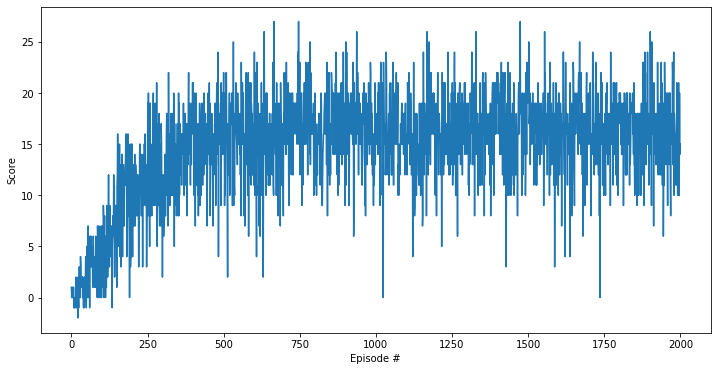

In [13]:
# plot the scores
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores[0:2000])), scores[0:2000])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig(framework + '_' + buffer_type  + '.png')

### 5. Watch a smart engine

In [12]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(framework + '_' + buffer_type + '_' + 'checkpoint.pth', map_location=lambda storage, loc: storage))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score

    agent.step(state, action, reward, next_state, done)
    state = next_state
    if done:                                       # exit loop if episode finished
        break

print("Score: {}".format(score))

Score: 18.0
